In [1]:
from IPython.display import display, Latex

def ldisplay(expr):
    display(Latex("$" + expr + "$"))

In [2]:
import numpy as np
from unc_tools import UncRegression

x = np.linspace(0,10,100) + np.random.uniform(low=-.05, high=.05, size= 100)
y = 5 * np.linspace(0,10,100) + 3 + np.random.uniform(low=-.05, high=.05, size= 100)

reg = UncRegression(x,y)

expr = reg.expression

ldisplay(expr.to_latex_expr())

<IPython.core.display.Latex object>

<Axes: title={'center': 'Only confidence band'}>

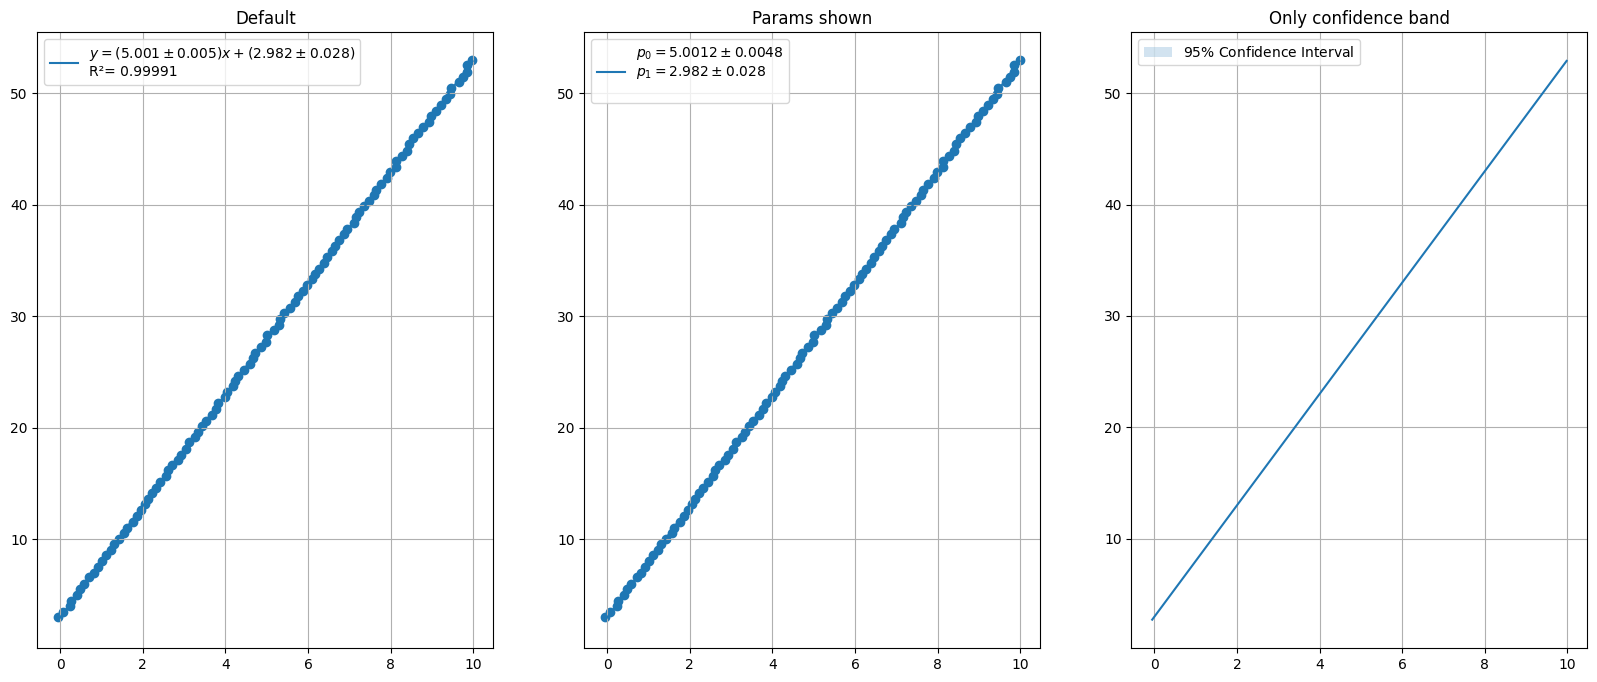

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3, figsize = (20,8), dpi = 100)
axes = axes.flatten()

axes[0].set_title("Default")
reg.plot(ax =axes[0])

axes[1].set_title("Params shown")
reg.plot(ax = axes[1], show_expr=False, show_r2=False, show_coefficients=True)

axes[2].set_title("Only confidence band")
reg.plot(ax = axes[2], show_expr=False, show_r2=False, show_scatter=False, show_band=True)

In [4]:
import uncertainties as unc

noise = np.random.uniform(low=-.05, high=.05, size= 30)

x = np.linspace(0,10,30) + noise
x = unc.unumpy.uarray(x, np.abs(noise))

y = 5 * np.linspace(0,10,30) + 3 + noise
y = unc.unumpy.uarray(y, np.abs(noise))

reg = UncRegression(x,y)

expr = reg.expression

ldisplay(expr.to_latex_expr())

<IPython.core.display.Latex object>

<Axes: title={'center': 'Only confidence band'}>

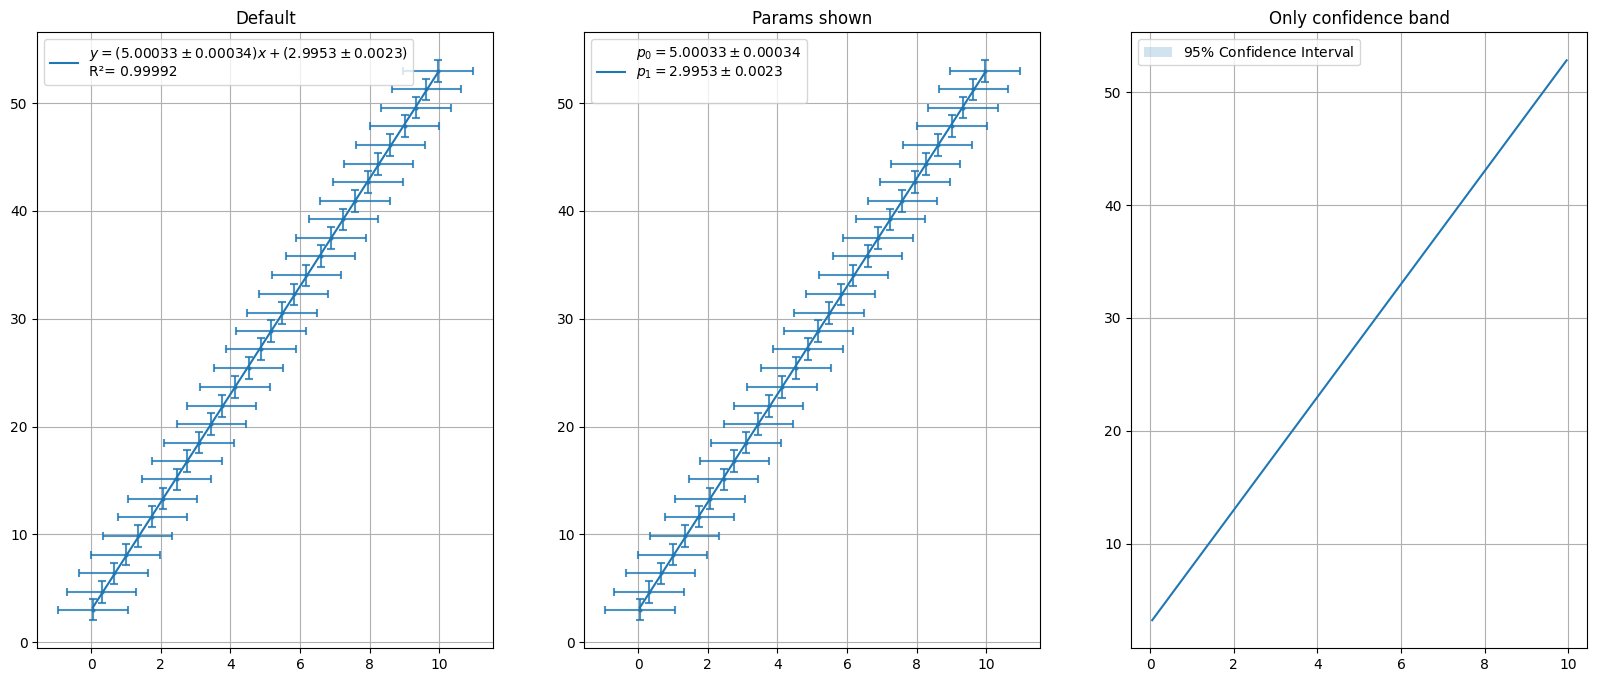

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3, figsize = (20,8), dpi = 100)
axes = axes.flatten()

axes[0].set_title("Default")
reg.plot(ax =axes[0])

axes[1].set_title("Params shown")
reg.plot(ax = axes[1], show_expr=False, show_r2=False, show_coefficients=True)

axes[2].set_title("Only confidence band")
reg.plot(ax = axes[2], show_expr=False, show_r2=False, show_scatter=False, show_band=True)


In [6]:
from unc_tools import FunctionBase1D

x = np.linspace(0,10,100) + np.random.uniform(low=-.05, high=.05, size= 100)
y = 5 * np.exp(np.linspace(0,10,100)) + 3 + np.random.uniform(low=-.05, high=.05, size= 100)

expr = FunctionBase1D("exp(x) * a + b")
reg = UncRegression(x,y, func = expr)

expr = reg.expression

ldisplay(expr.to_latex_expr())

<IPython.core.display.Latex object>

<Axes: title={'center': 'Only confidence band'}>

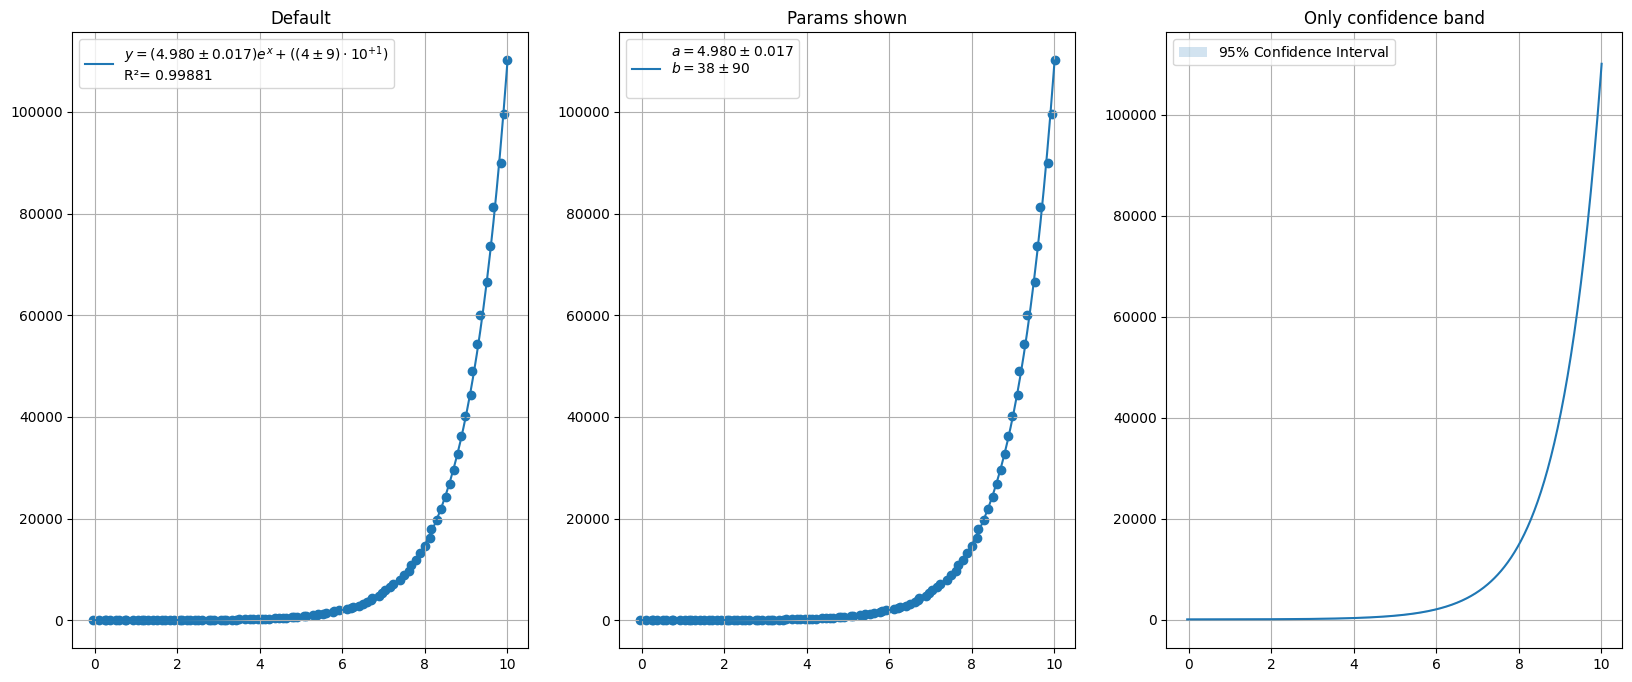

In [7]:
fig, axes = plt.subplots(1,3, figsize = (20,8), dpi = 100)
axes = axes.flatten()

axes[0].set_title("Default")
reg.plot(ax =axes[0])

axes[1].set_title("Params shown")
reg.plot(ax = axes[1], show_expr=False, show_r2=False, show_coefficients=True)

axes[2].set_title("Only confidence band")
reg.plot(ax = axes[2], show_expr=False, show_r2=False, show_scatter=False, show_band=True)

In [8]:
import uncertainties as unc

noise = np.random.uniform(low=-.05, high=.05, size= 30)

x = np.linspace(0,10,30) + noise
y = 5 * unc.unumpy.exp(x) + 3 + noise
y = unc.unumpy.uarray(y, np.abs(noise))


expr = FunctionBase1D("exp(x) * a + b")
reg = UncRegression(x,y, func = expr)

expr = reg.expression

ldisplay(expr.to_latex_expr())

<IPython.core.display.Latex object>

<Axes: title={'center': 'Only scatter shown'}>

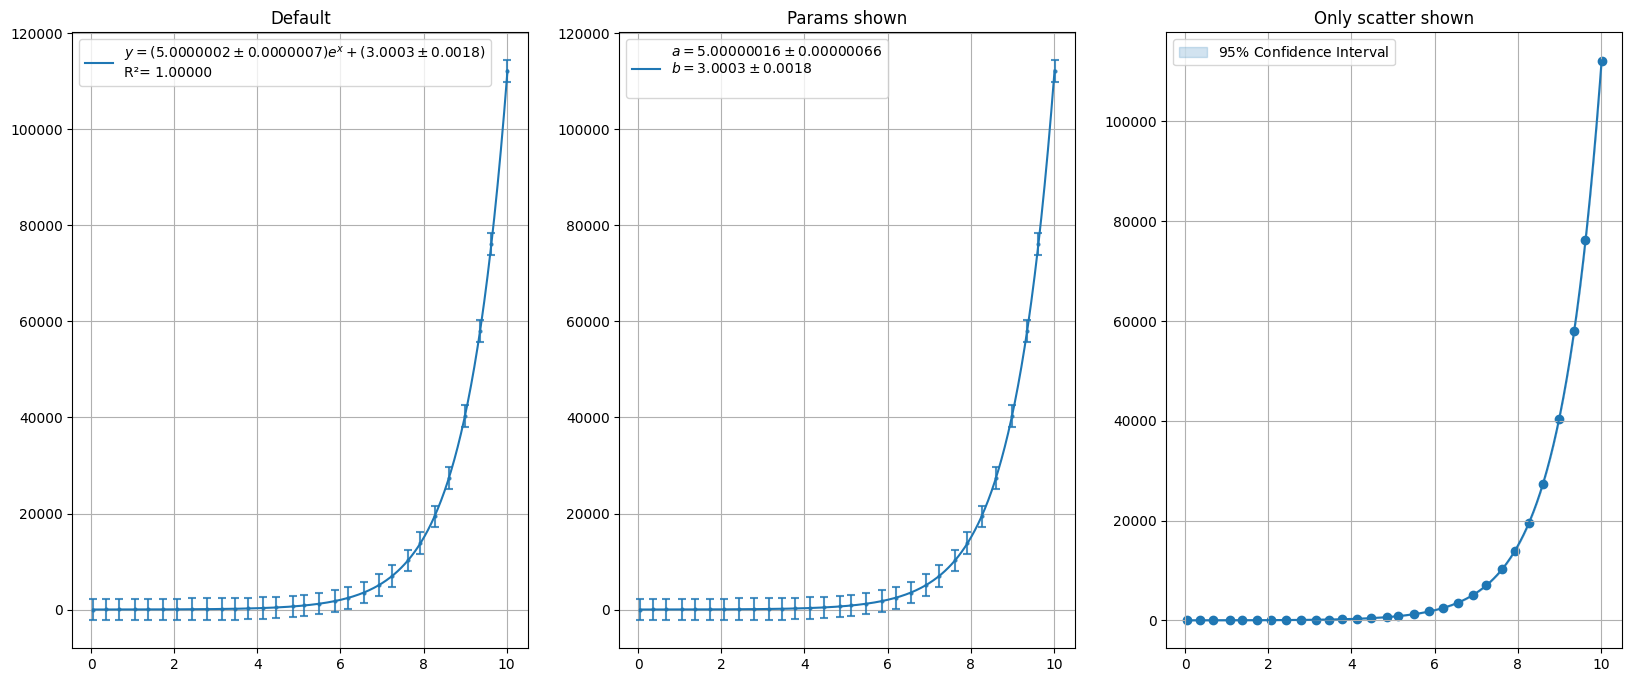

In [9]:
fig, axes = plt.subplots(1,3, figsize = (20,8), dpi = 100)
axes = axes.flatten()

axes[0].set_title("Default")
reg.plot(ax =axes[0])

axes[1].set_title("Params shown")
reg.plot(ax = axes[1], show_expr=False, show_r2=False, show_coefficients=True)

axes[2].set_title("Only scatter shown")
reg.plot(ax = axes[2], show_expr=False, show_r2=False, show_errors=False, show_band=True)